# Summary barplots of model performance

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

from plotting_functions import create_barplot_with_variance_whiskers

plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.family'] = 'Times New Roman'
plt.rc('axes', labelsize=13.5)
plt.rc('axes', titlesize=15)
plt.rc('legend', fontsize=10)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

## Aggregated over all non-sequential models

In [131]:
data = pd.read_csv('./data/profit.csv', sep=';').set_index('index')

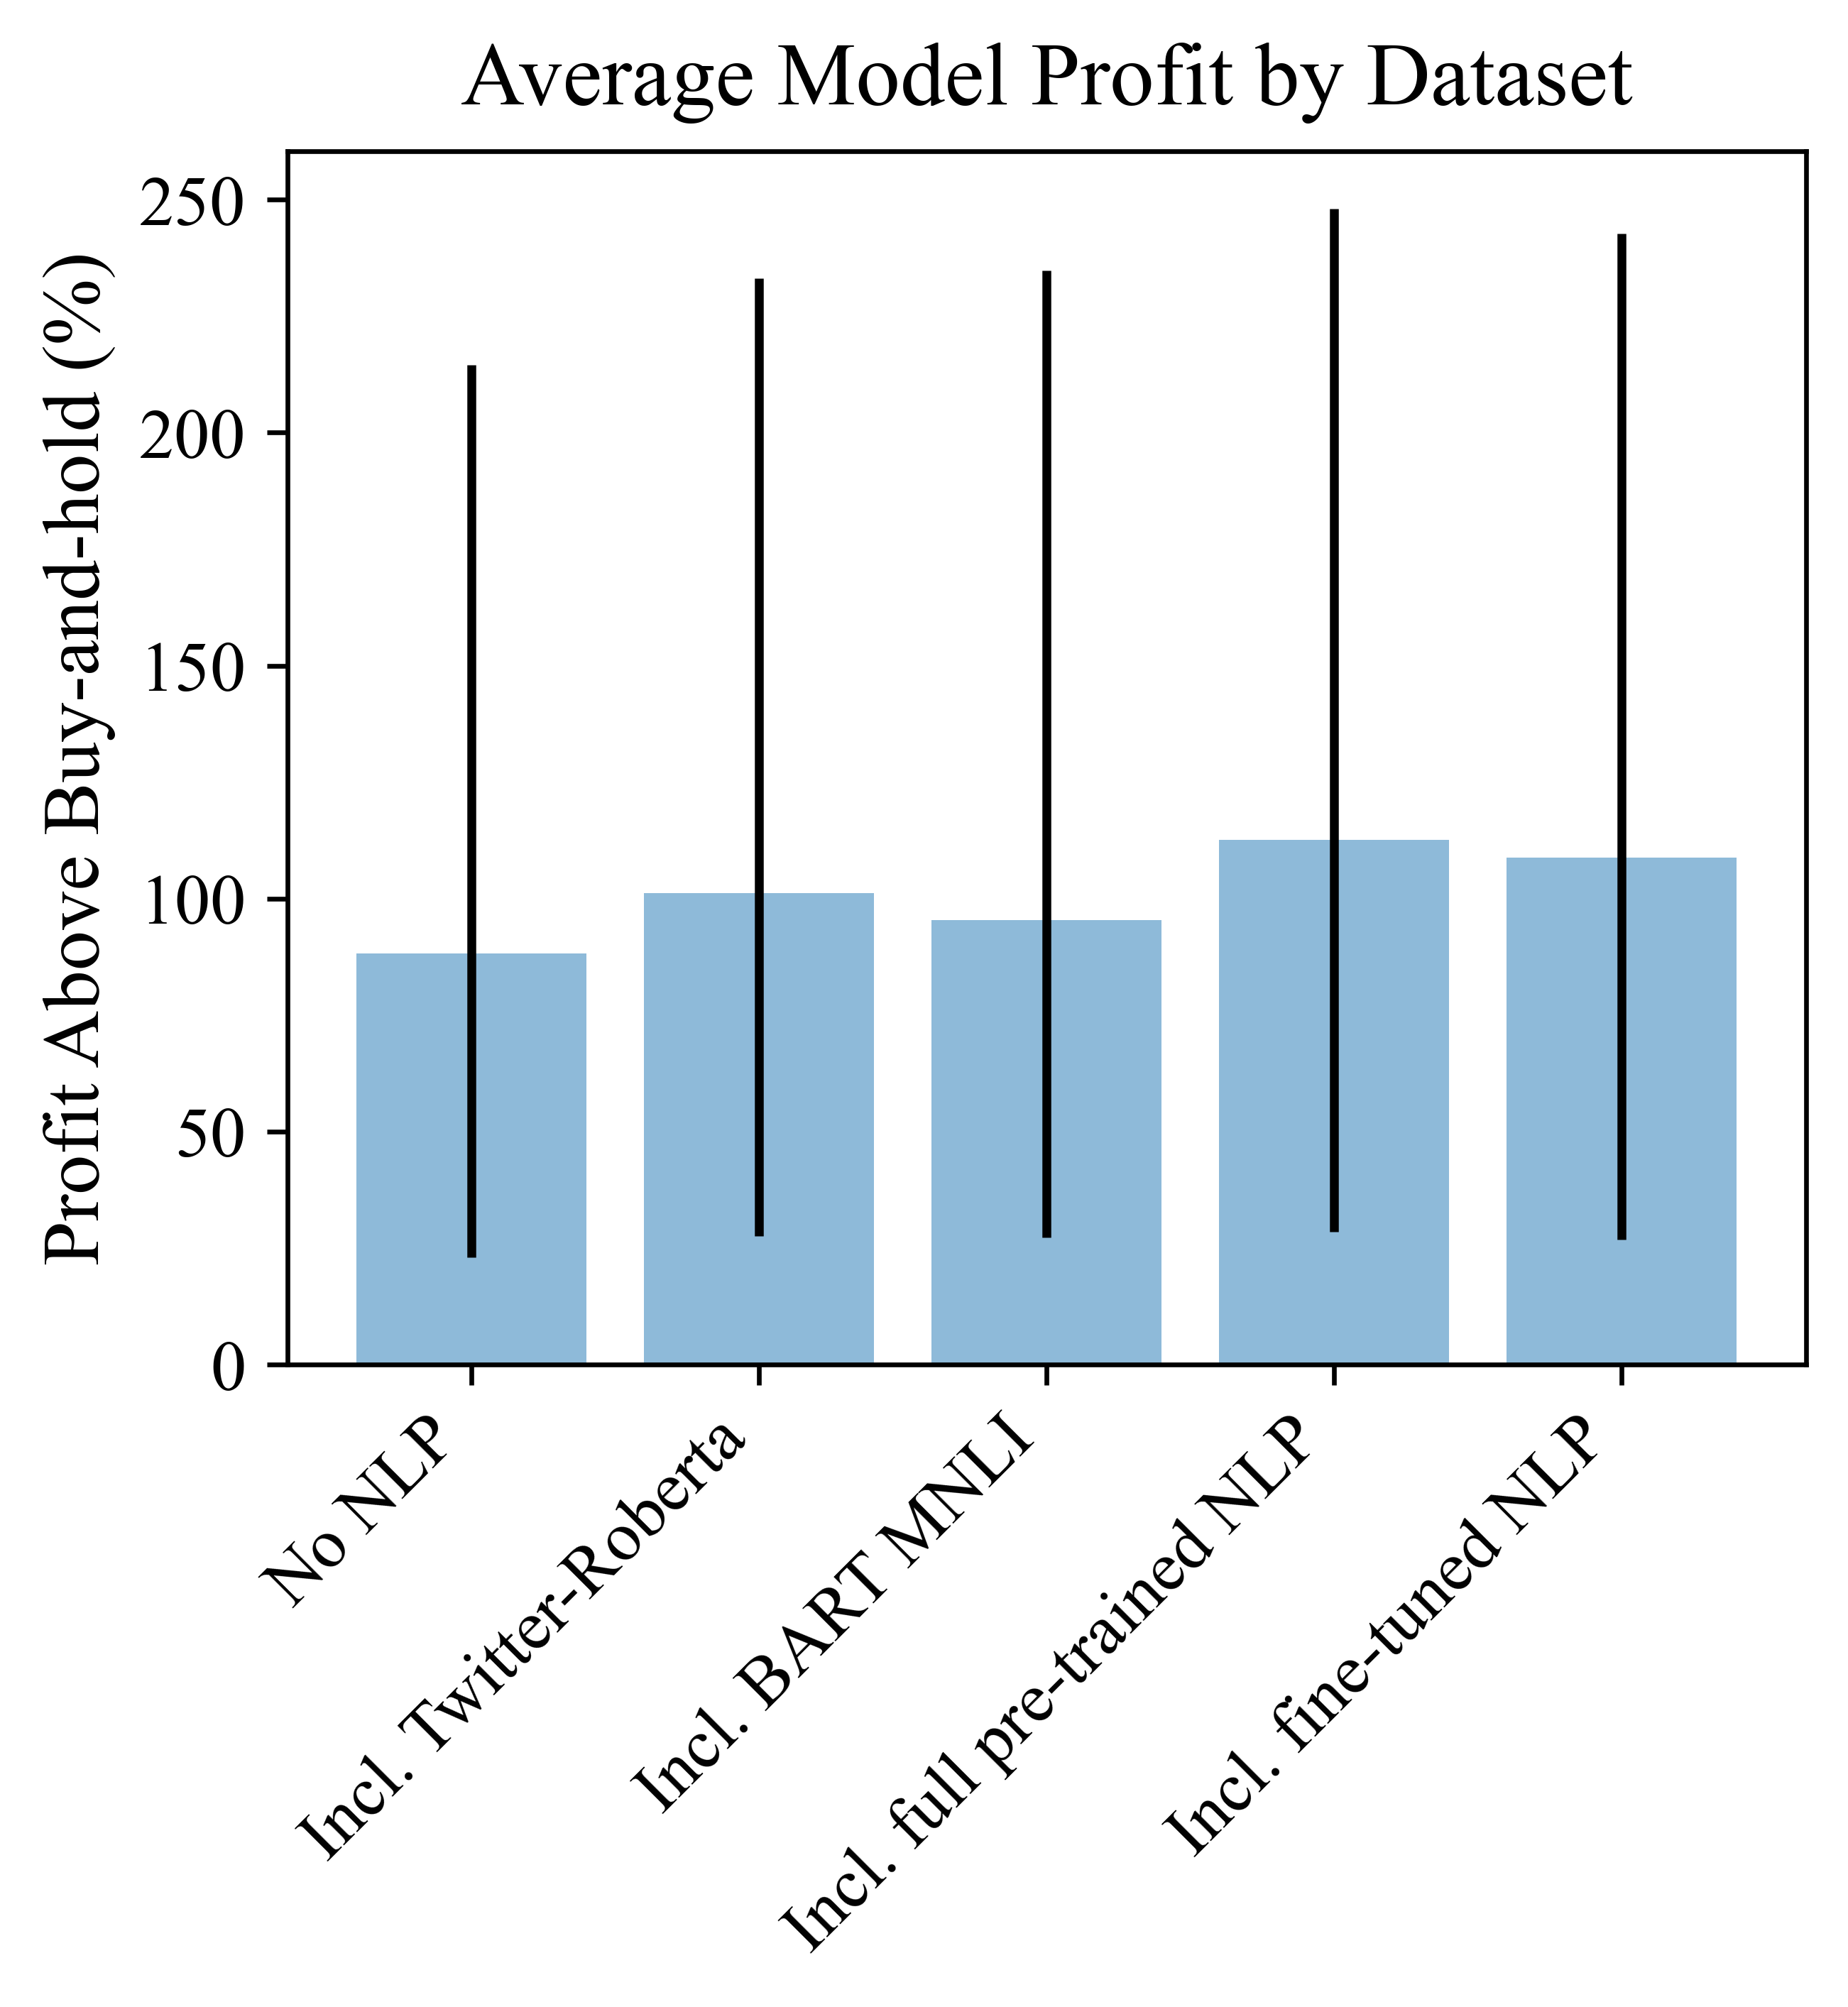

In [132]:
ax = create_barplot_with_variance_whiskers(
    data,
    title='Average Model Profit by Dataset',
    whiskers=True,
    ylabel='Profit Above Buy-and-hold (%)',
    xlabels_angle=45,
    axis='columns',
    dtype='percent',
    figsize=(4.6, 3.7),
)
# ax.legend(loc='upper left')
plt.show()

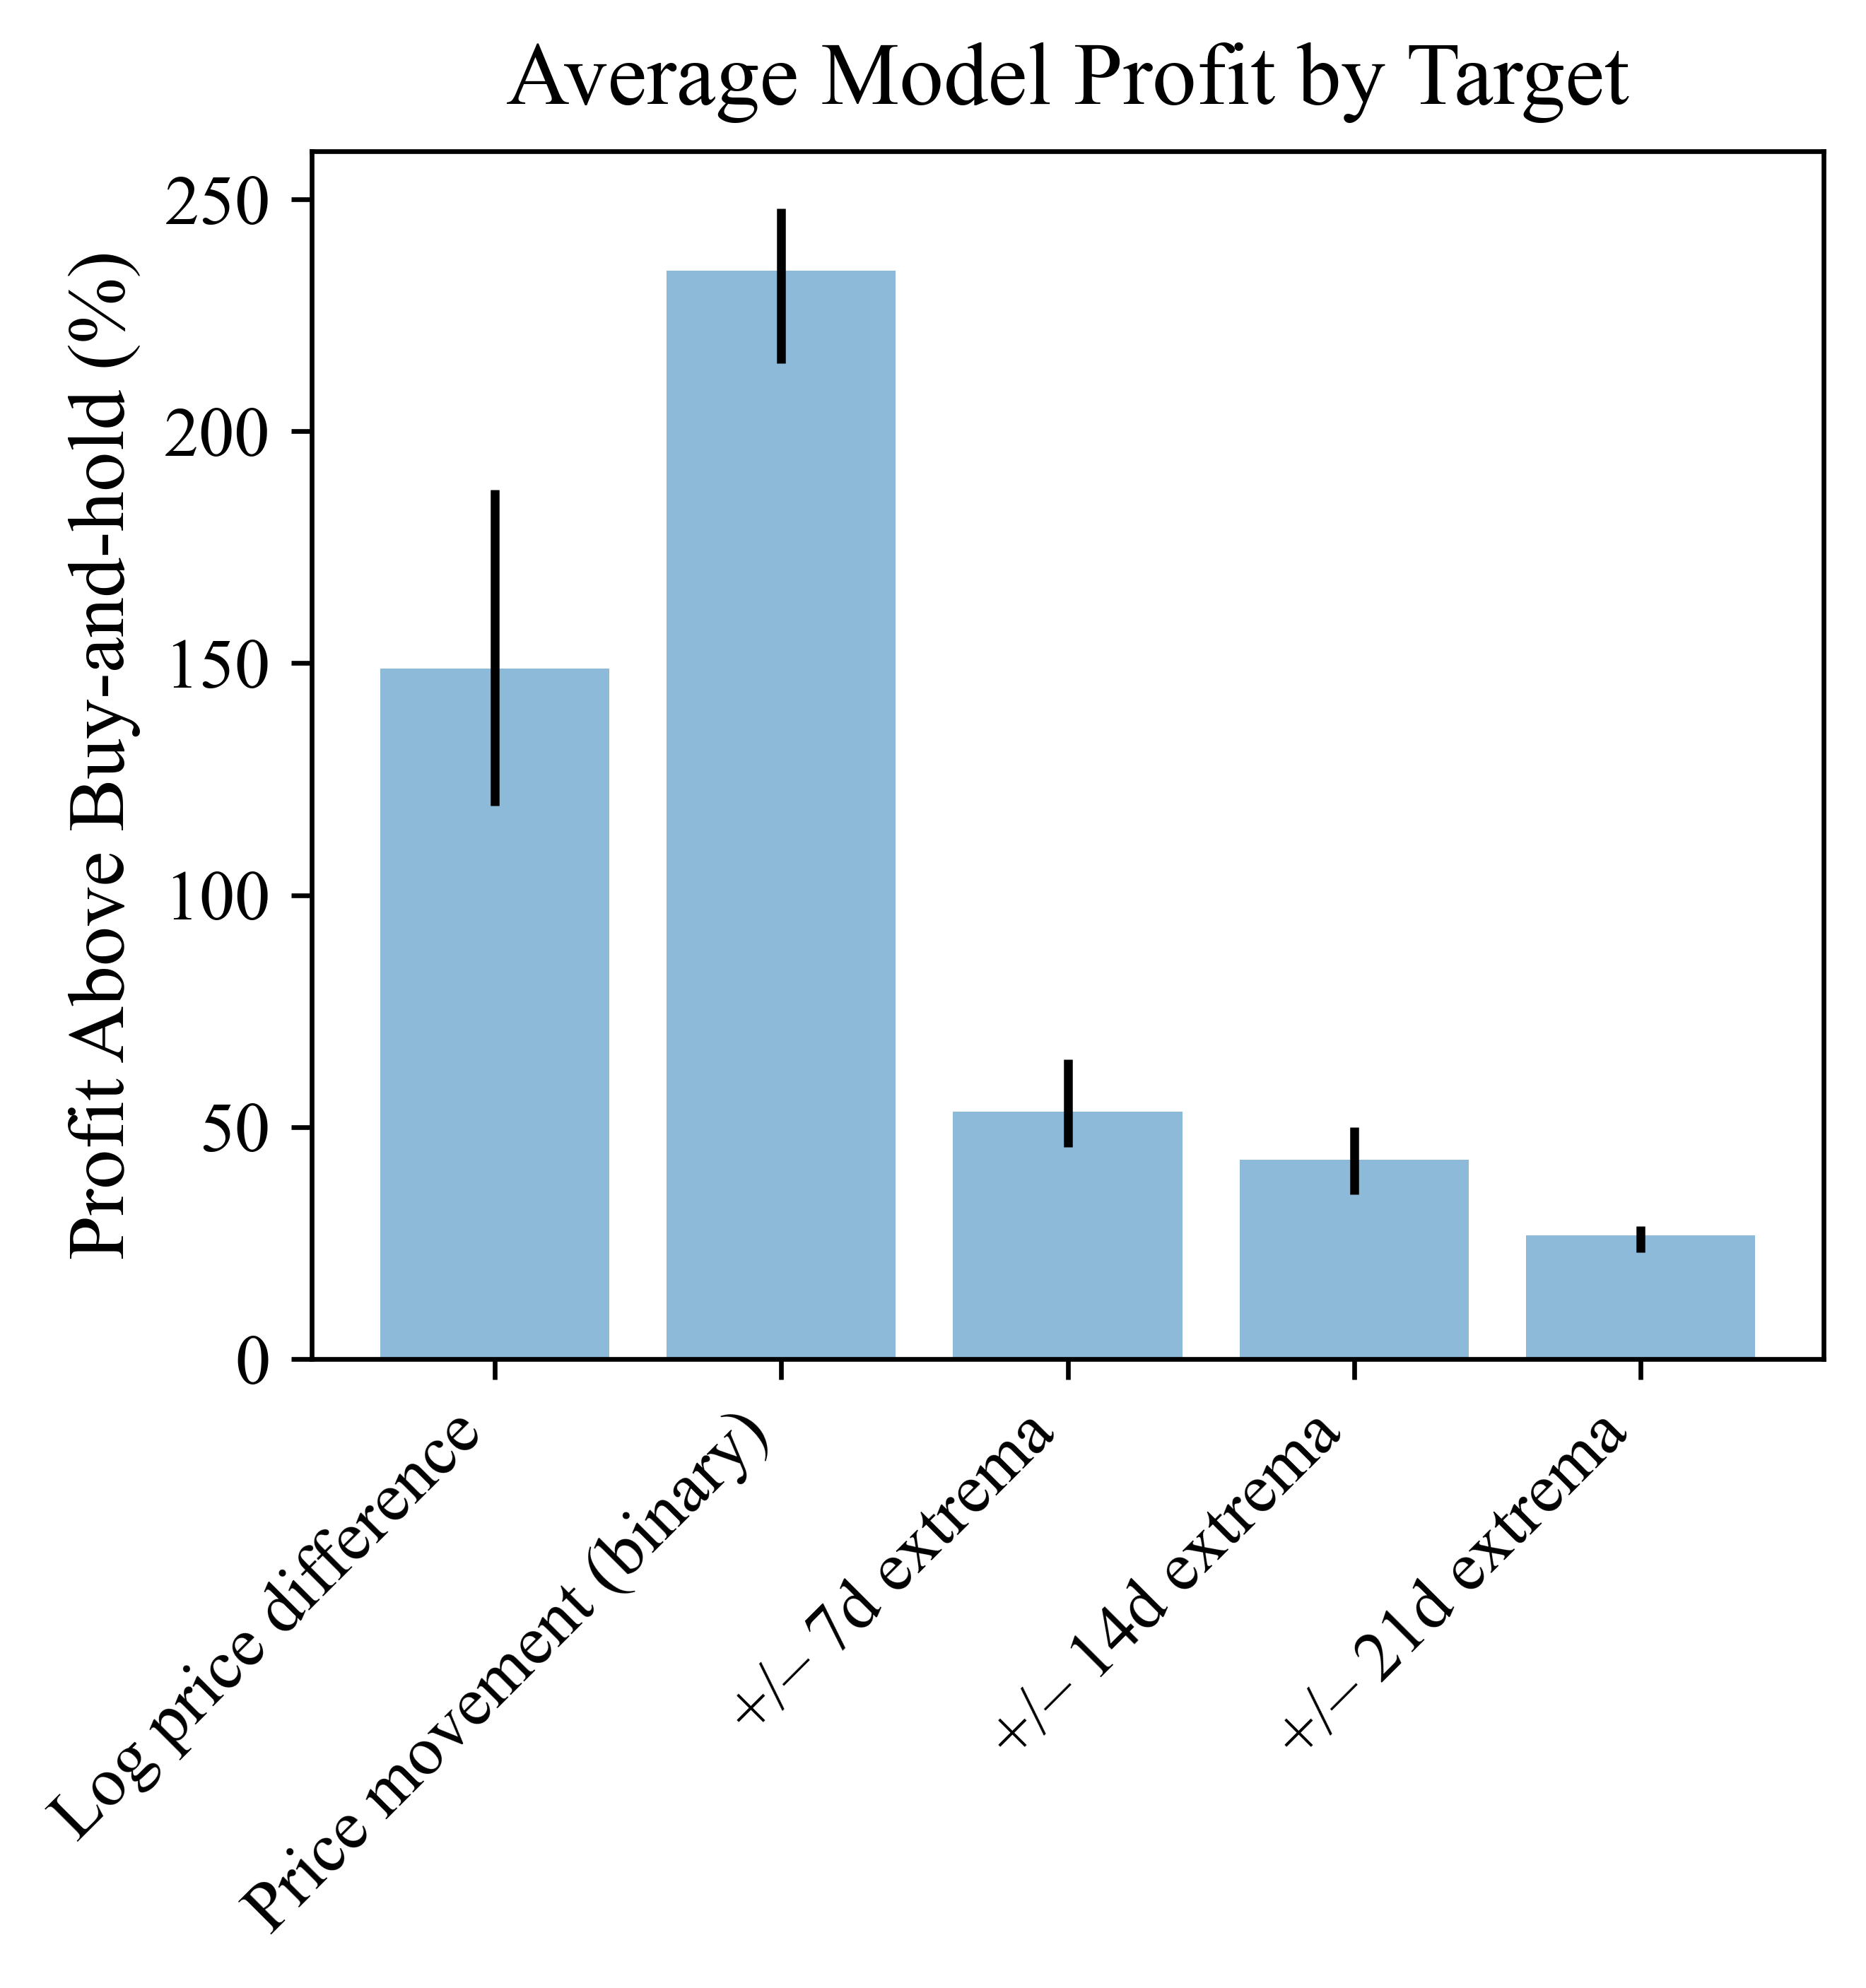

In [133]:
create_barplot_with_variance_whiskers(
    data,
    title='Average Model Profit by Target',
    whiskers=True,
    ylabel='Profit Above Buy-and-hold (%)',
    xlabels_angle=45,
    axis='rows',
    dtype='percent',
    figsize=(4.6, 3.7),
);

In [134]:
data = pd.read_csv('./data/auc_roc.csv', sep=';').set_index('index')

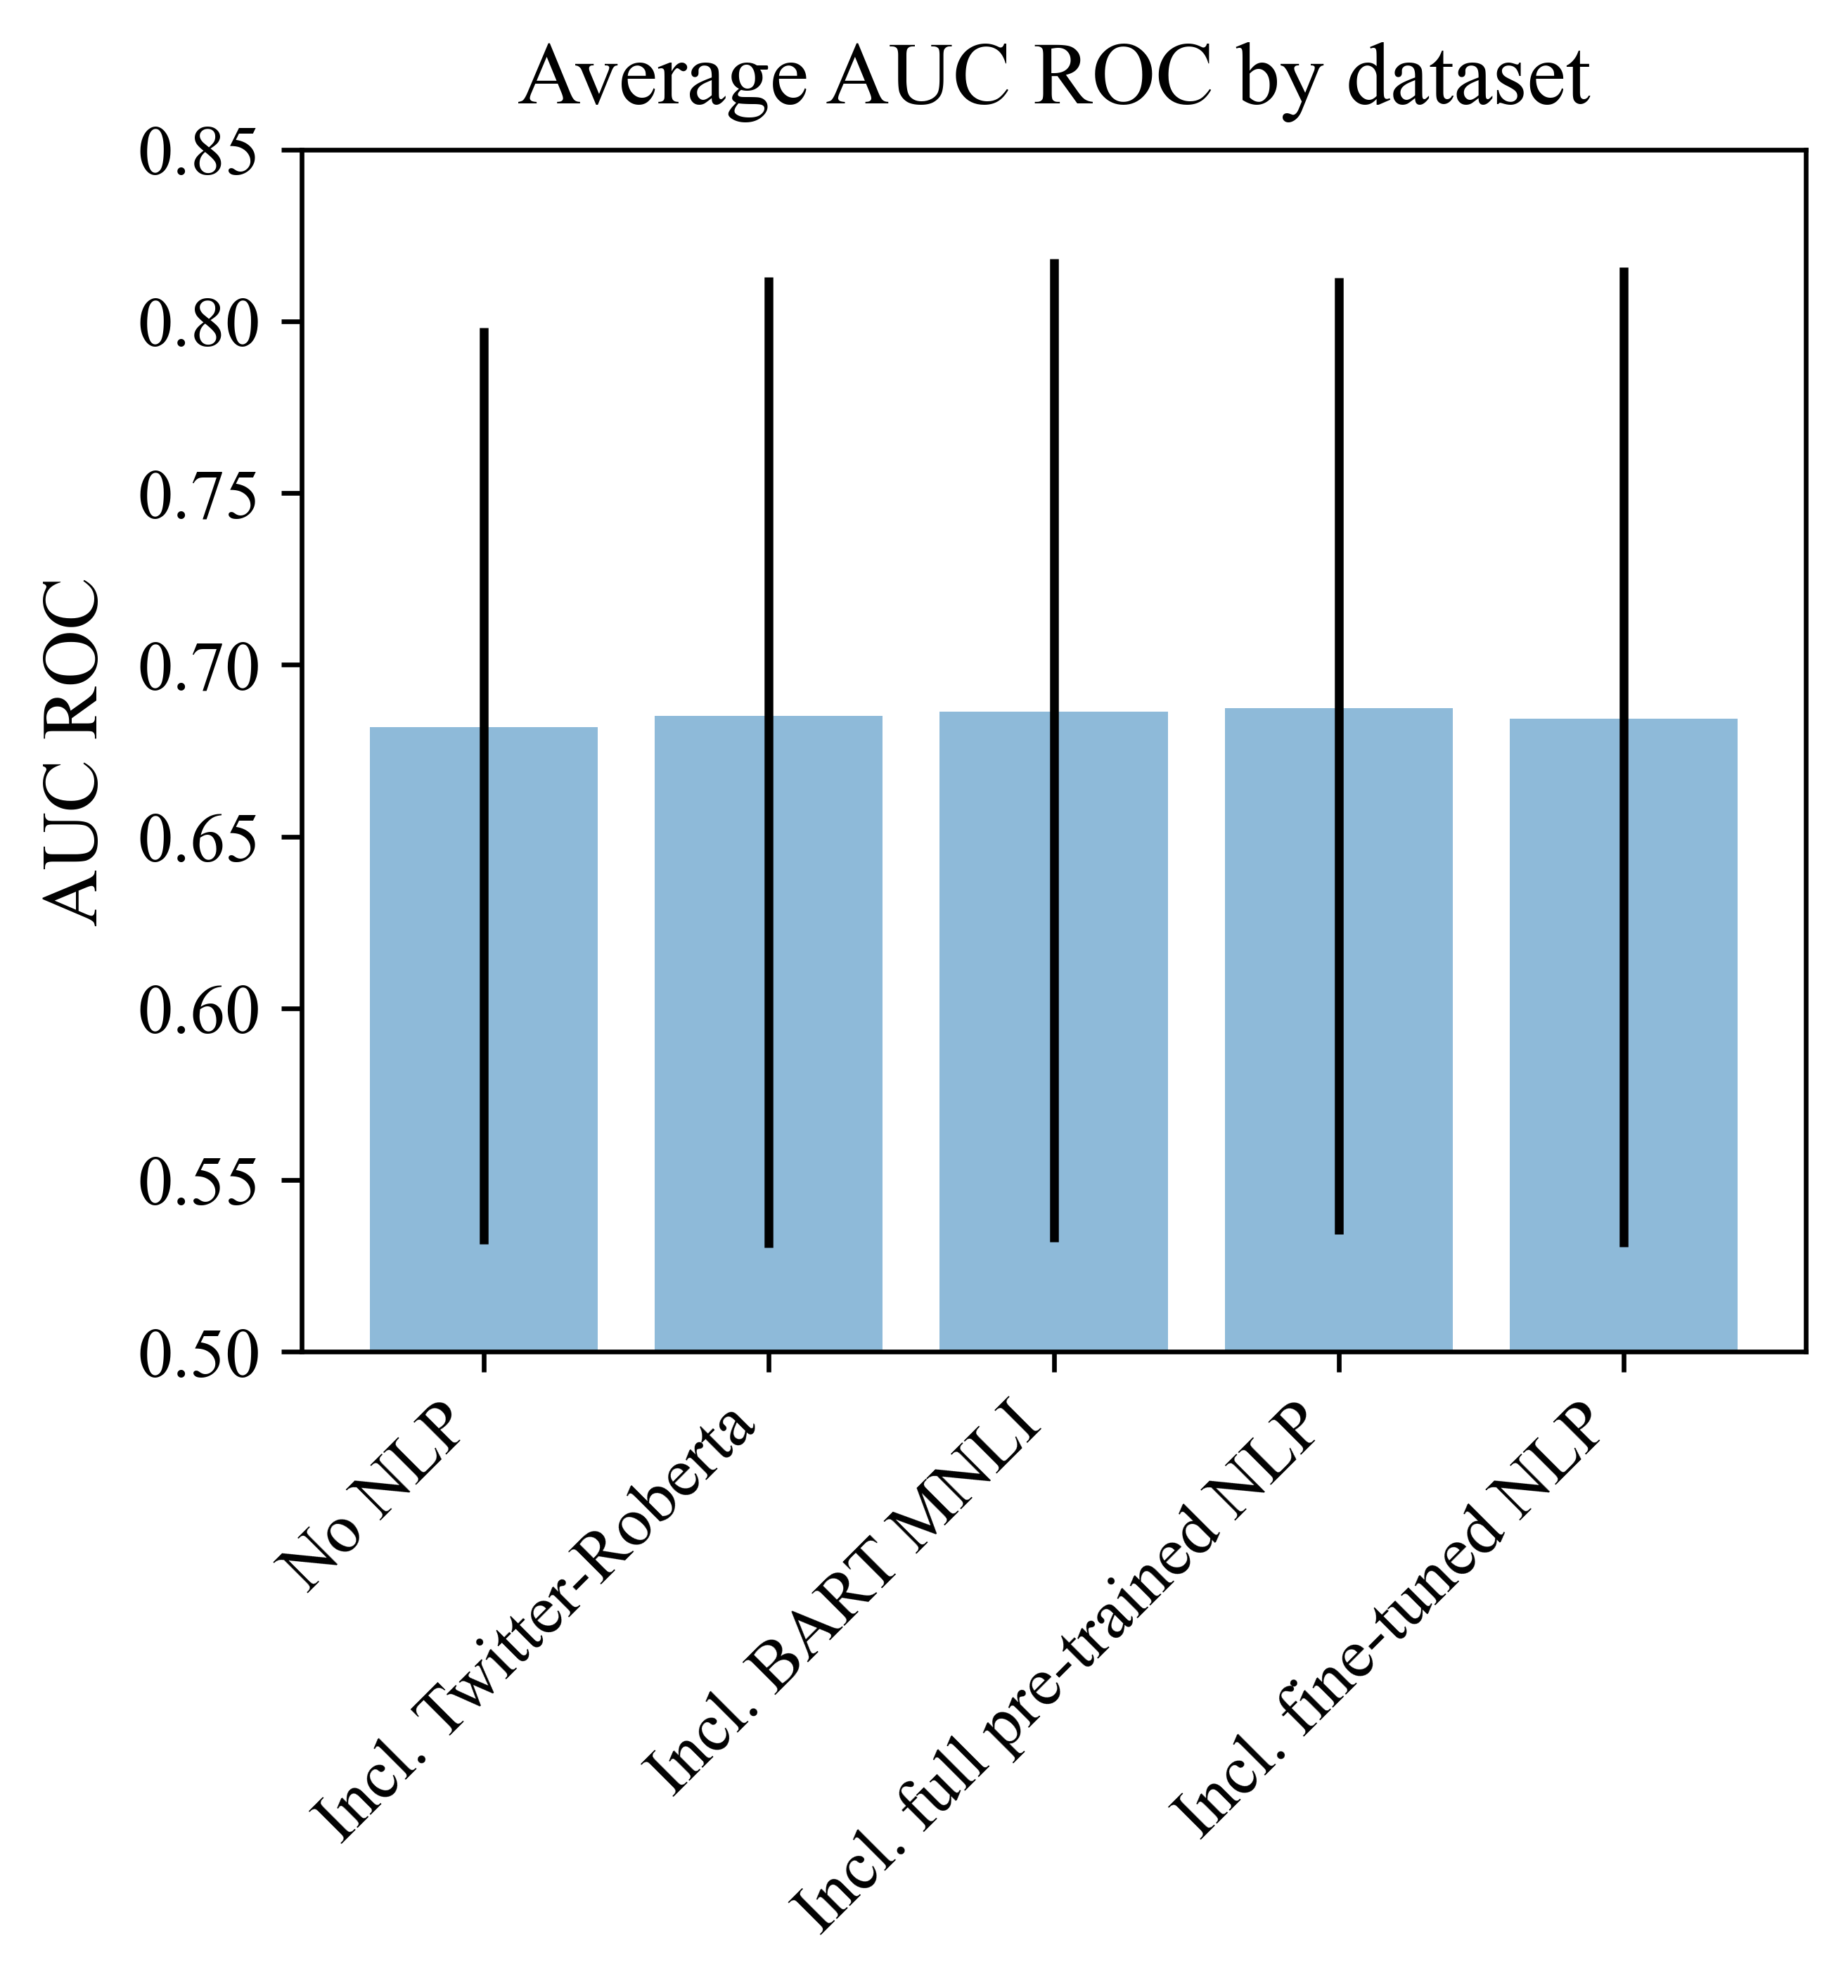

In [135]:
ax = create_barplot_with_variance_whiskers(
    data,
    title='Average AUC ROC by dataset',
    whiskers=True,
    ylabel='AUC ROC',
    xlabels_angle=45,
    axis='columns',
    dtype='numeric',
    figsize=(4.6, 3.7),
)
ax.set_ylim([0.5, 0.85])
plt.show()

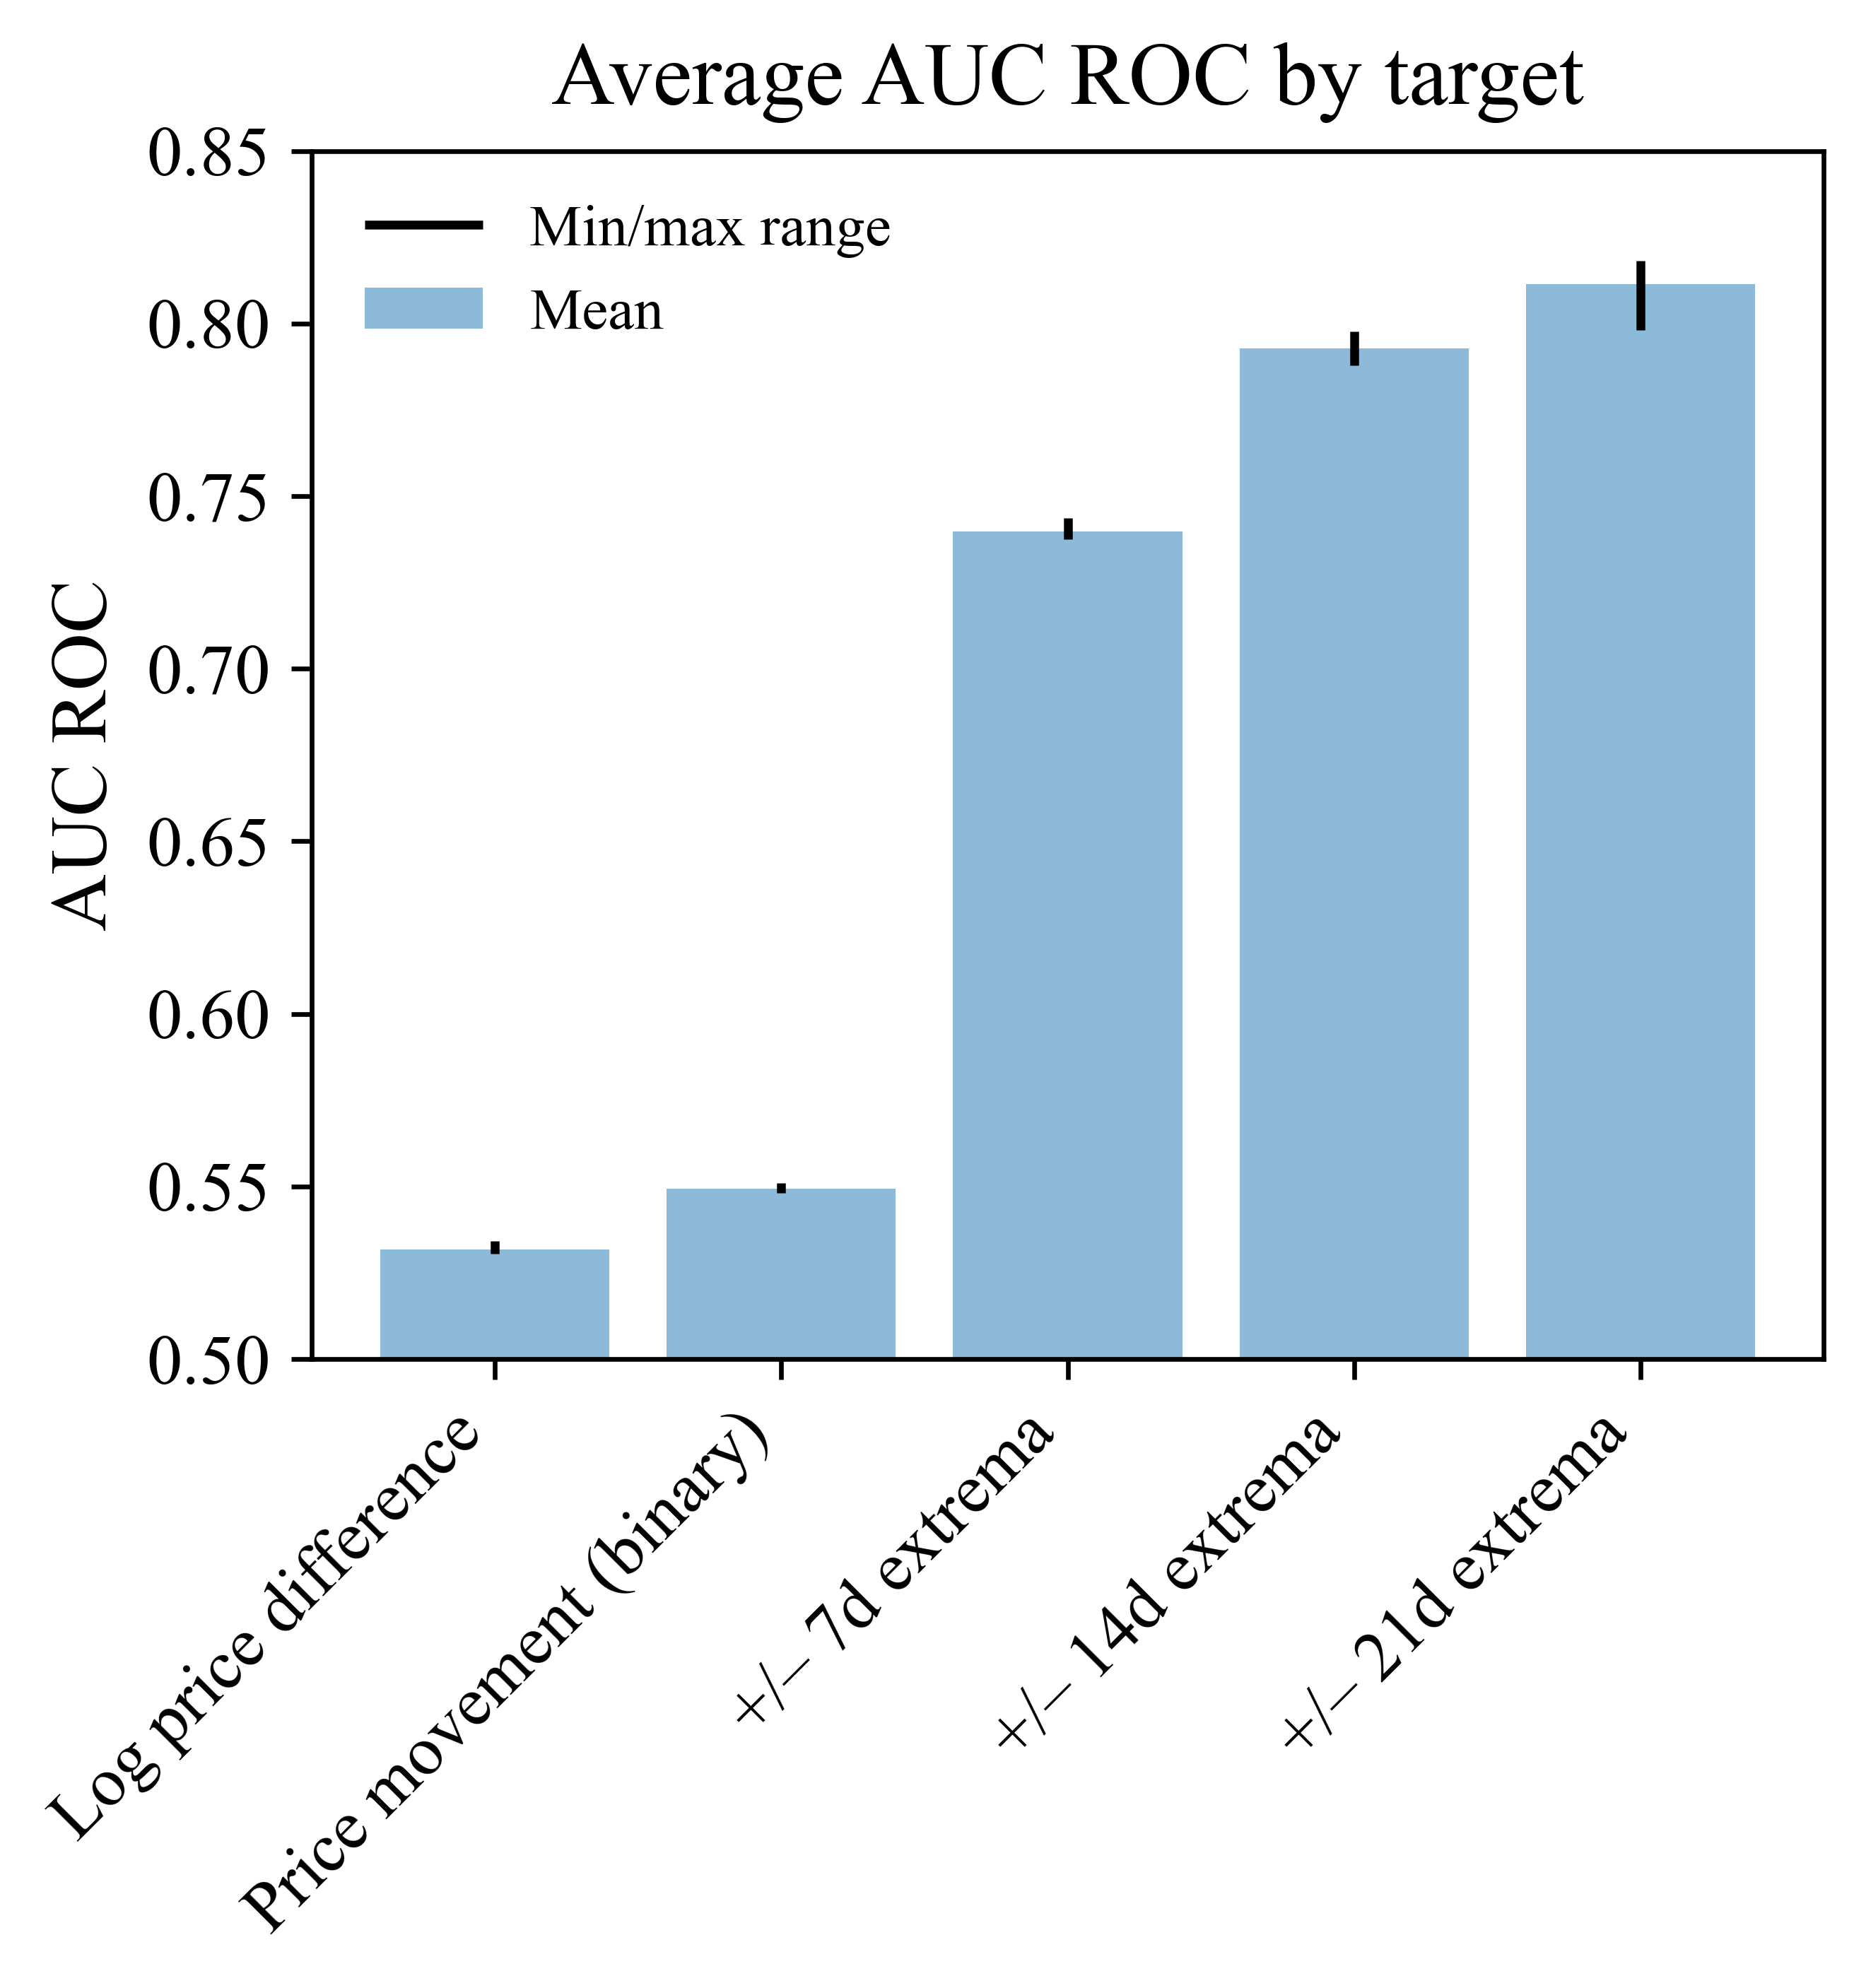

In [136]:
ax = create_barplot_with_variance_whiskers(
    data,
    title='Average AUC ROC by target',
    whiskers=True,
    ylabel='AUC ROC',
    xlabels_angle=45,
    axis='rows',
    dtype='numeric',
    figsize=(4.6, 3.7),
)
ax.legend(loc='upper left', frameon=False)
ax.set_ylim([0.5, 0.85])
plt.show()

## Aggregated only for the MLP / FNN

In [137]:
data = pd.read_csv('./data/mlp_profit.csv', sep=';').set_index('index')

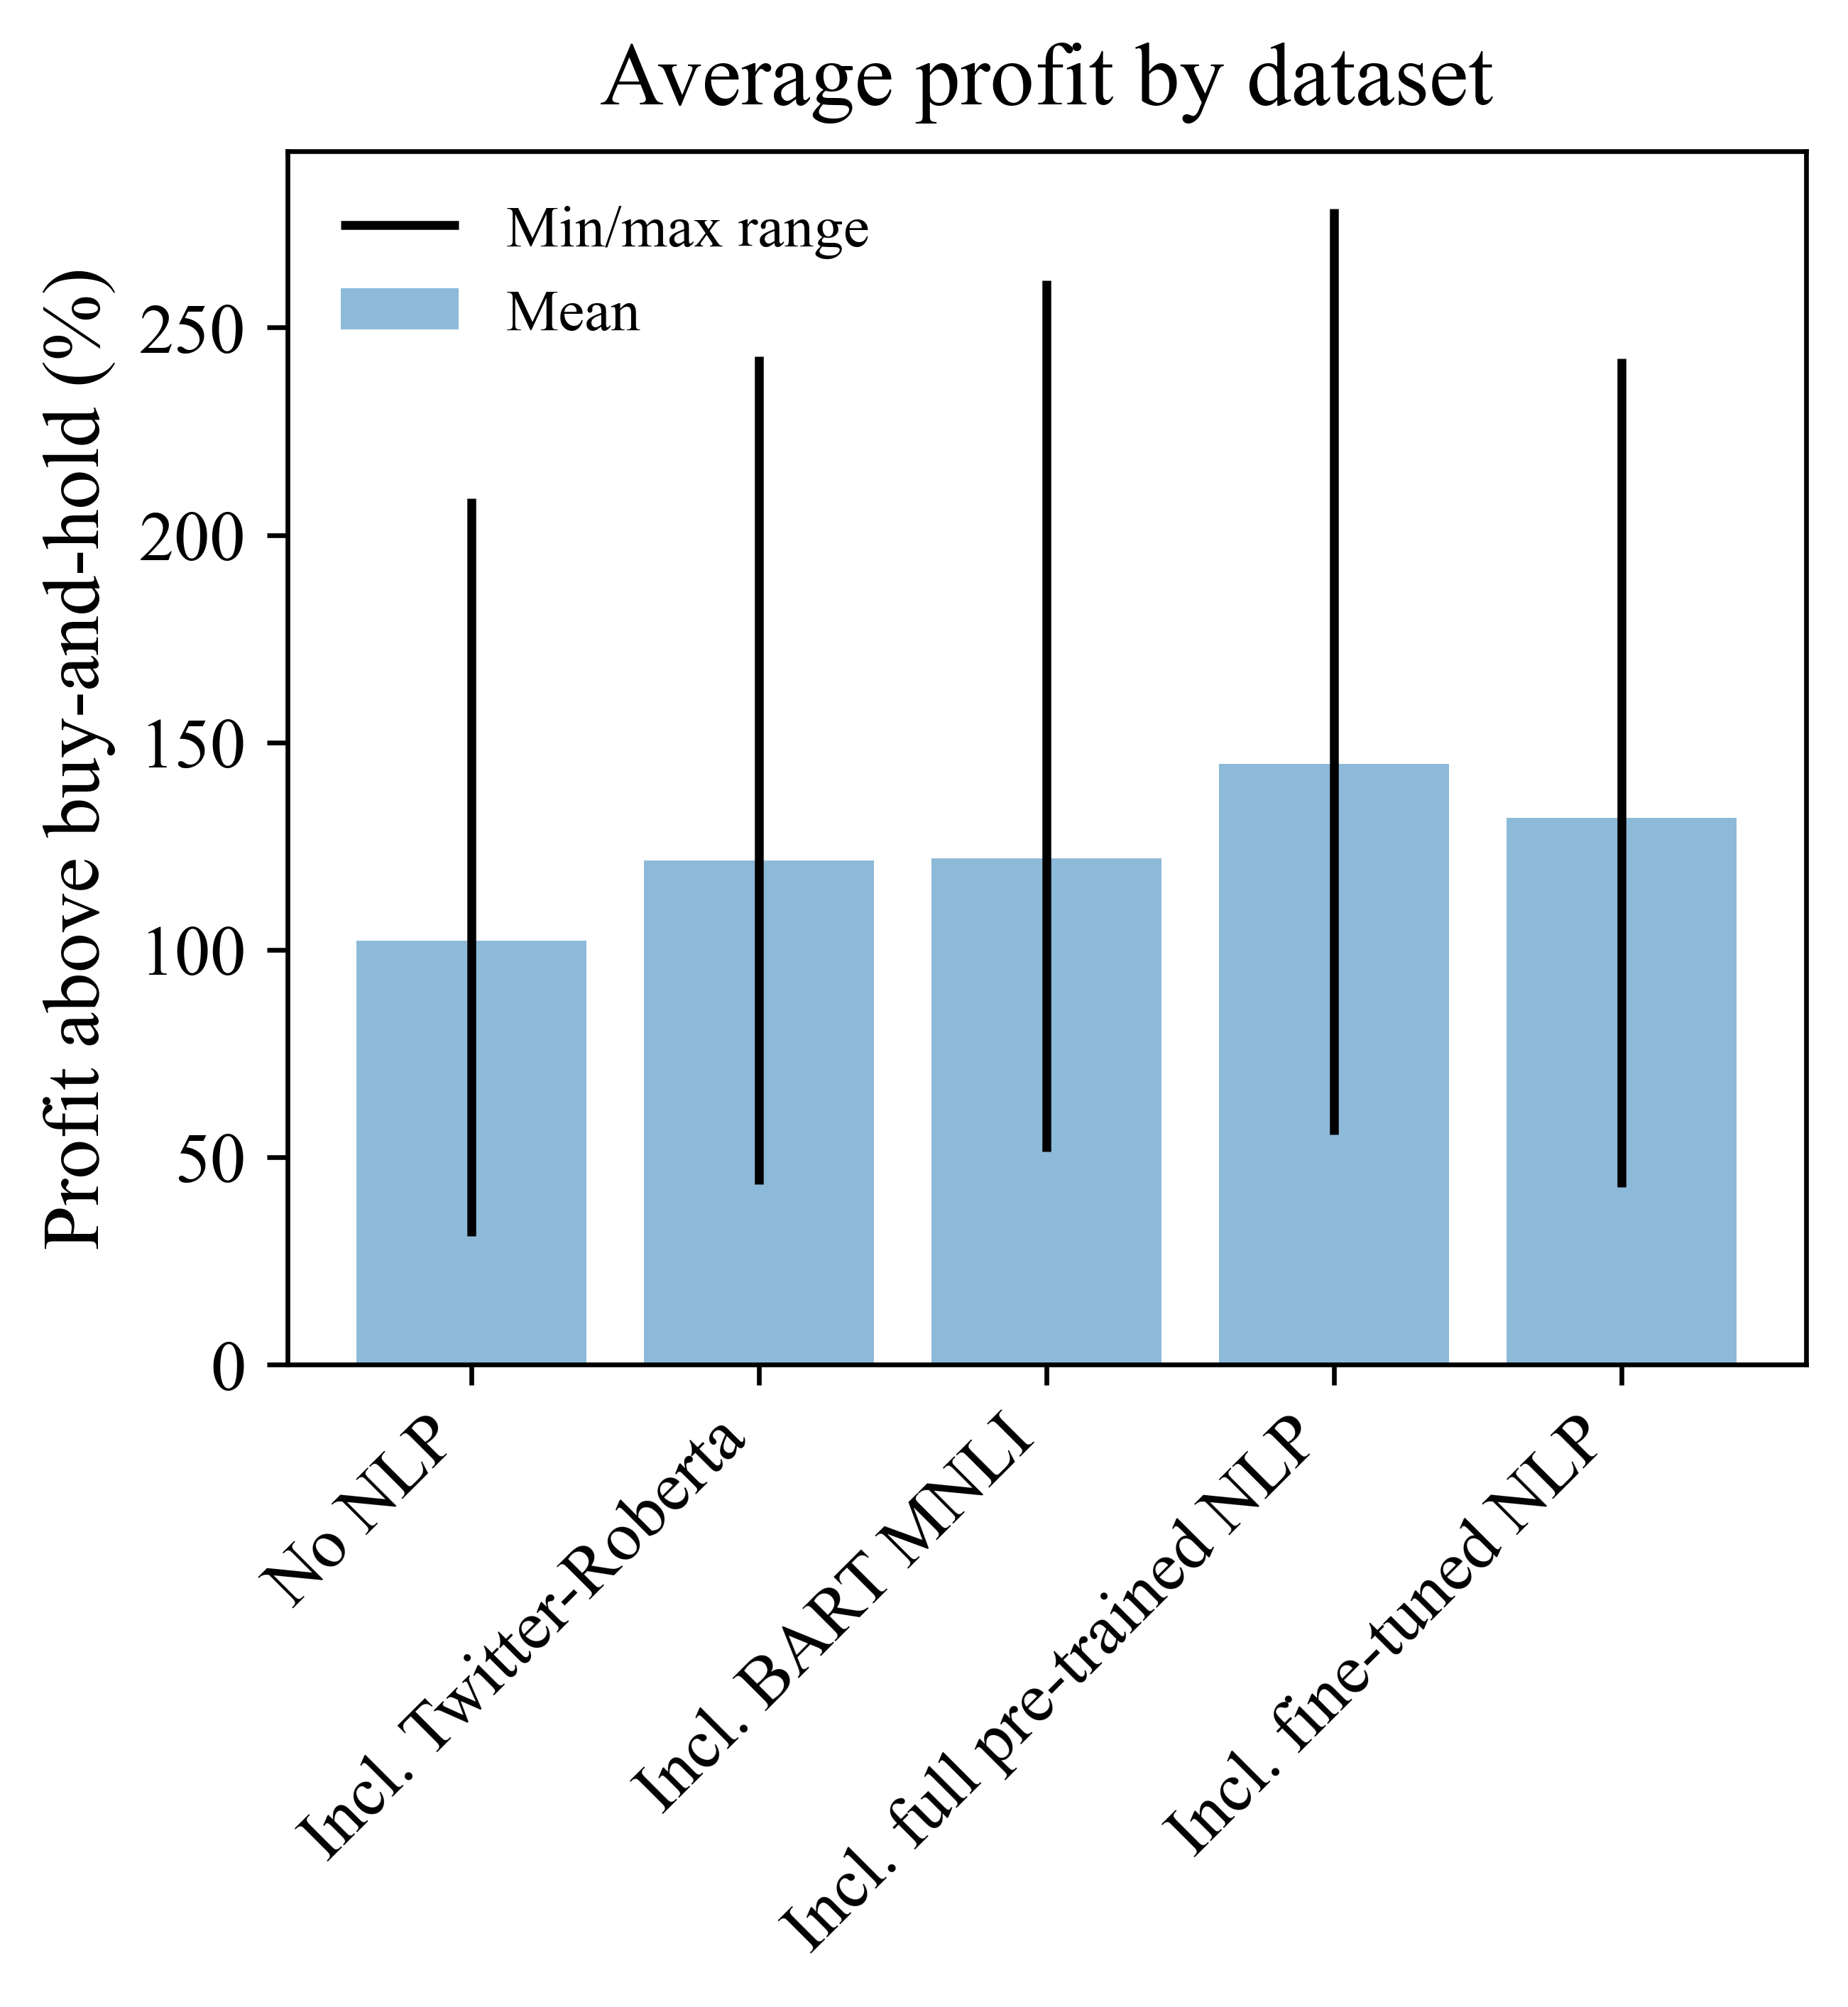

In [138]:
ax = create_barplot_with_variance_whiskers(
    data,
    title='Average profit by dataset',
    whiskers=True,
    ylabel='Profit above buy-and-hold (%)',
    xlabels_angle=45,
    axis='columns',
    dtype='percent',
    figsize=(4.6, 3.7),
)
ax.legend(loc='upper left', frameon=False)
plt.show()

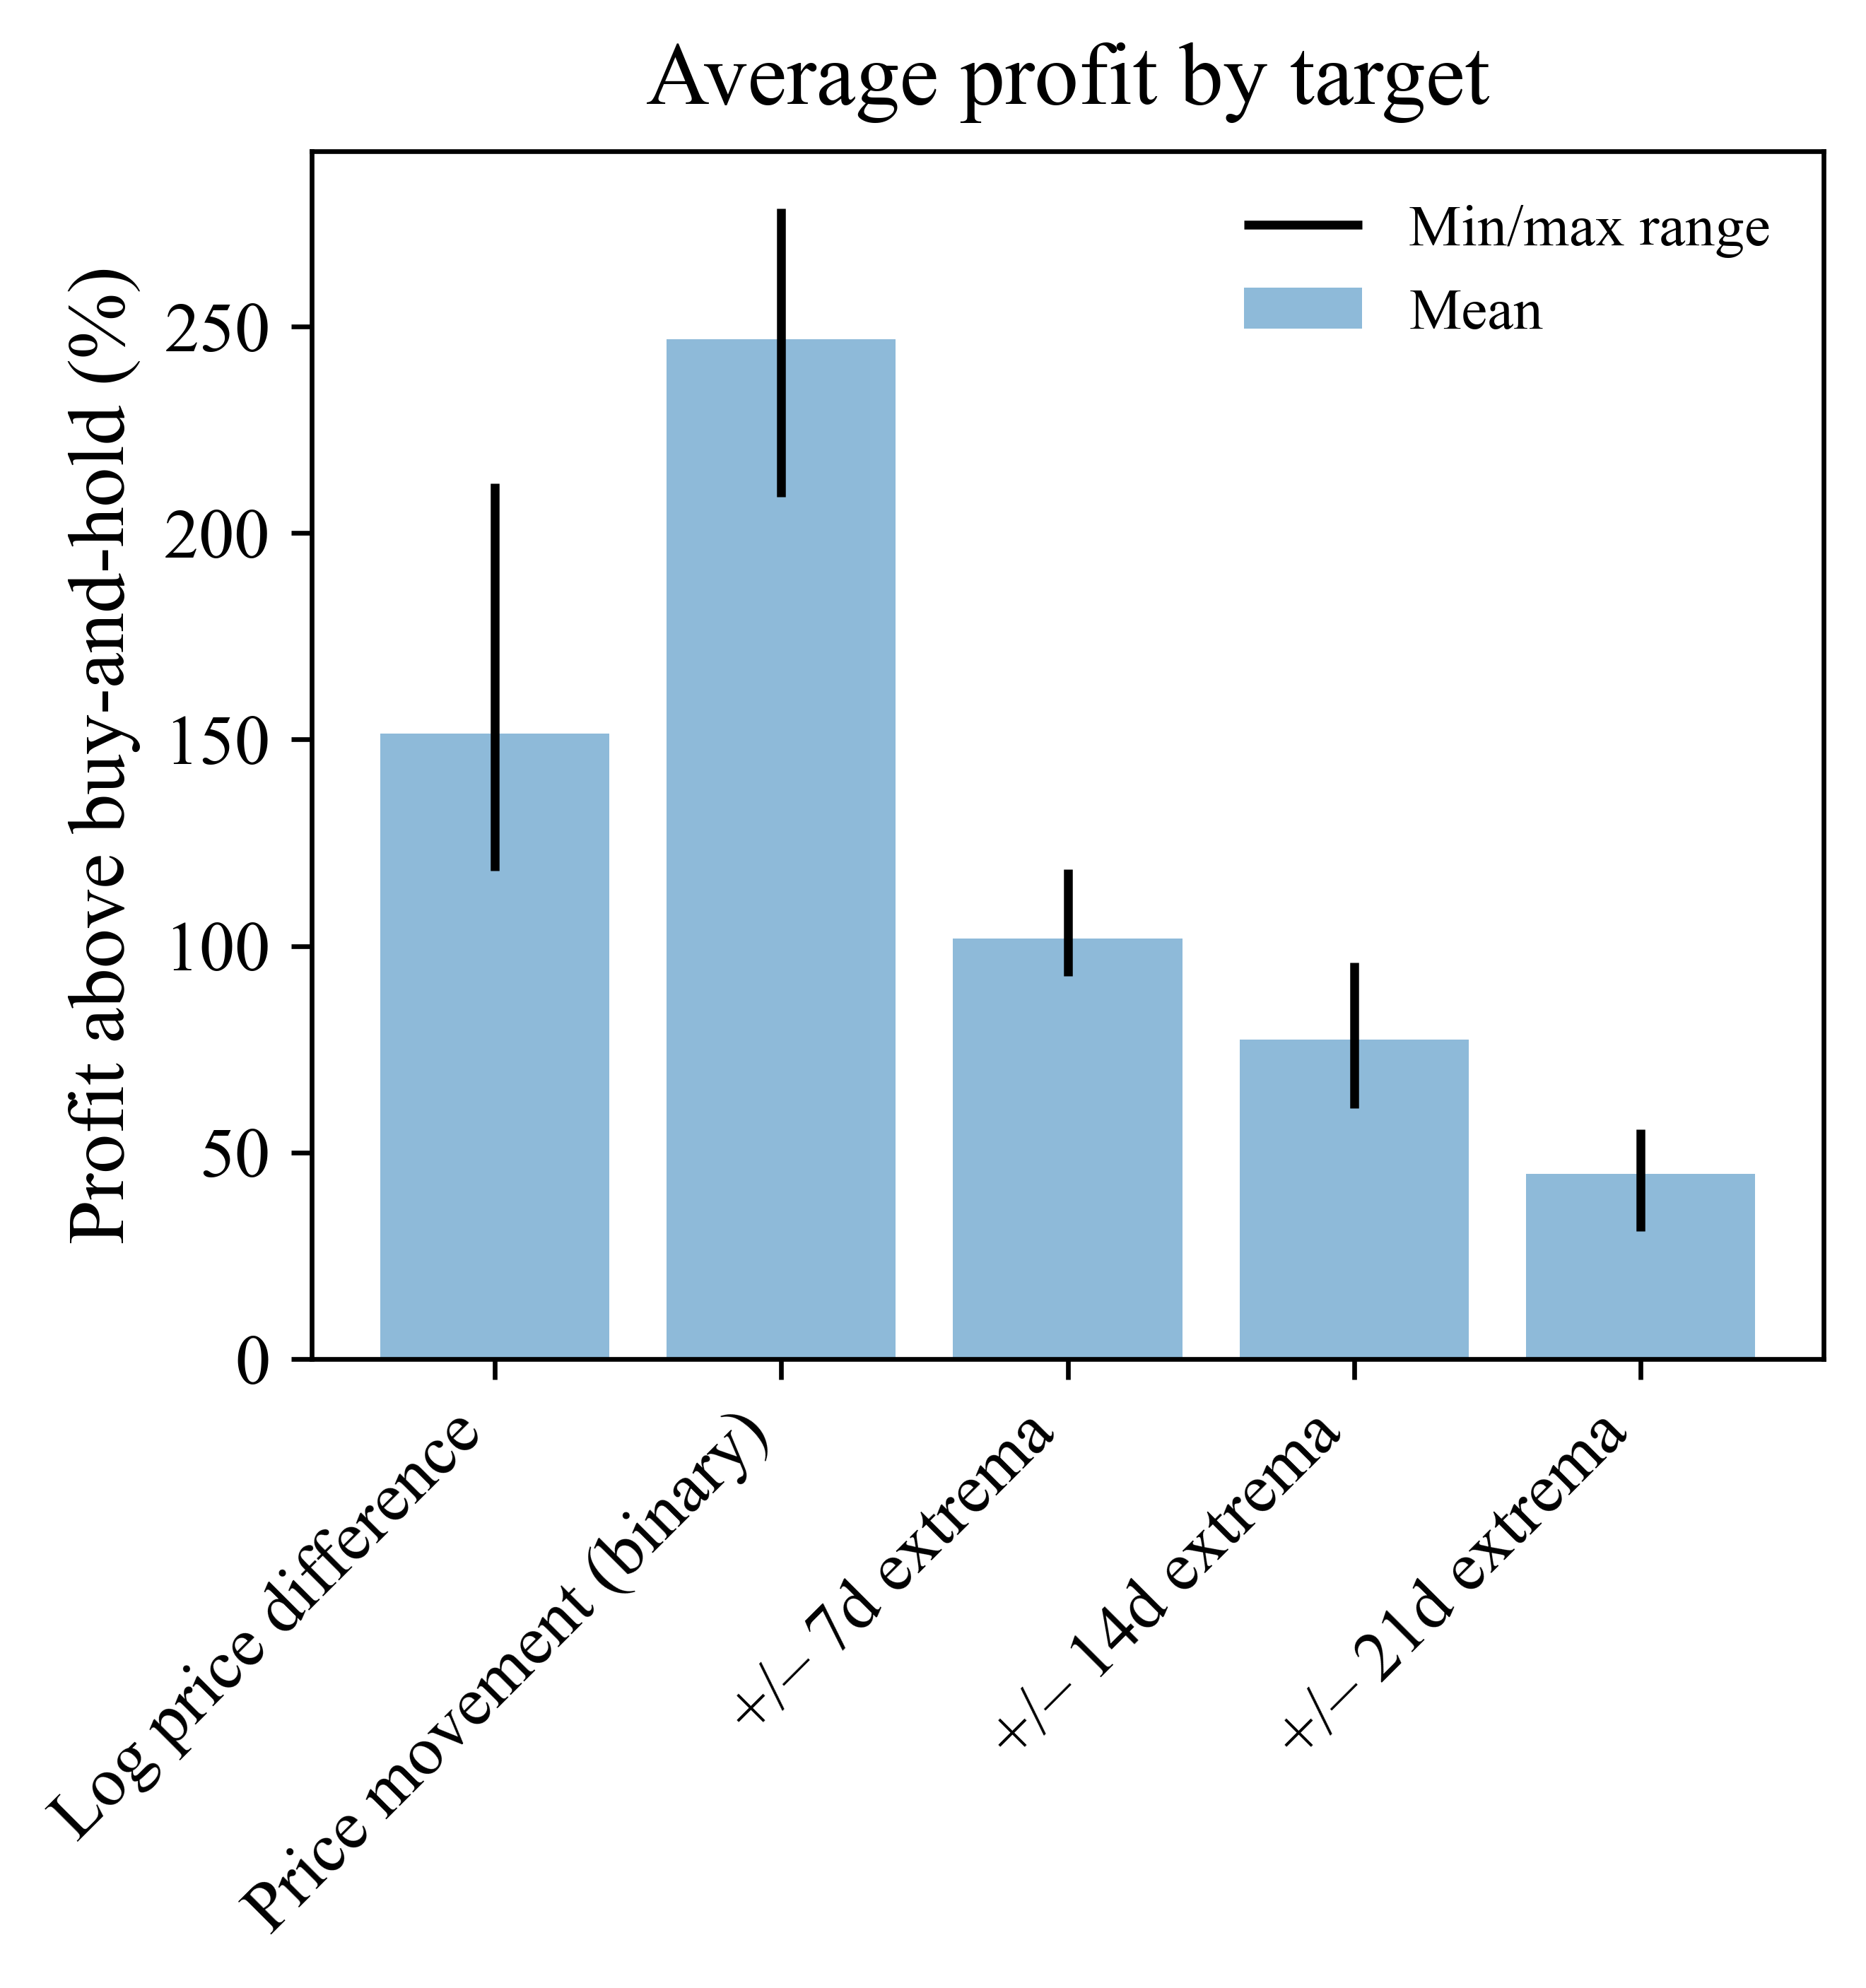

In [139]:
ax = create_barplot_with_variance_whiskers(
    data,
    title='Average profit by target',
    whiskers=True,
    ylabel='Profit above buy-and-hold (%)',
    xlabels_angle=45,
    axis='rows',
    dtype='percent',
    figsize=(4.6, 3.7),
)
ax.legend(loc='upper right', frameon=False)
plt.show()

In [140]:
data = pd.read_csv('./data/mlp_auc_roc.csv', sep=';').set_index('index')

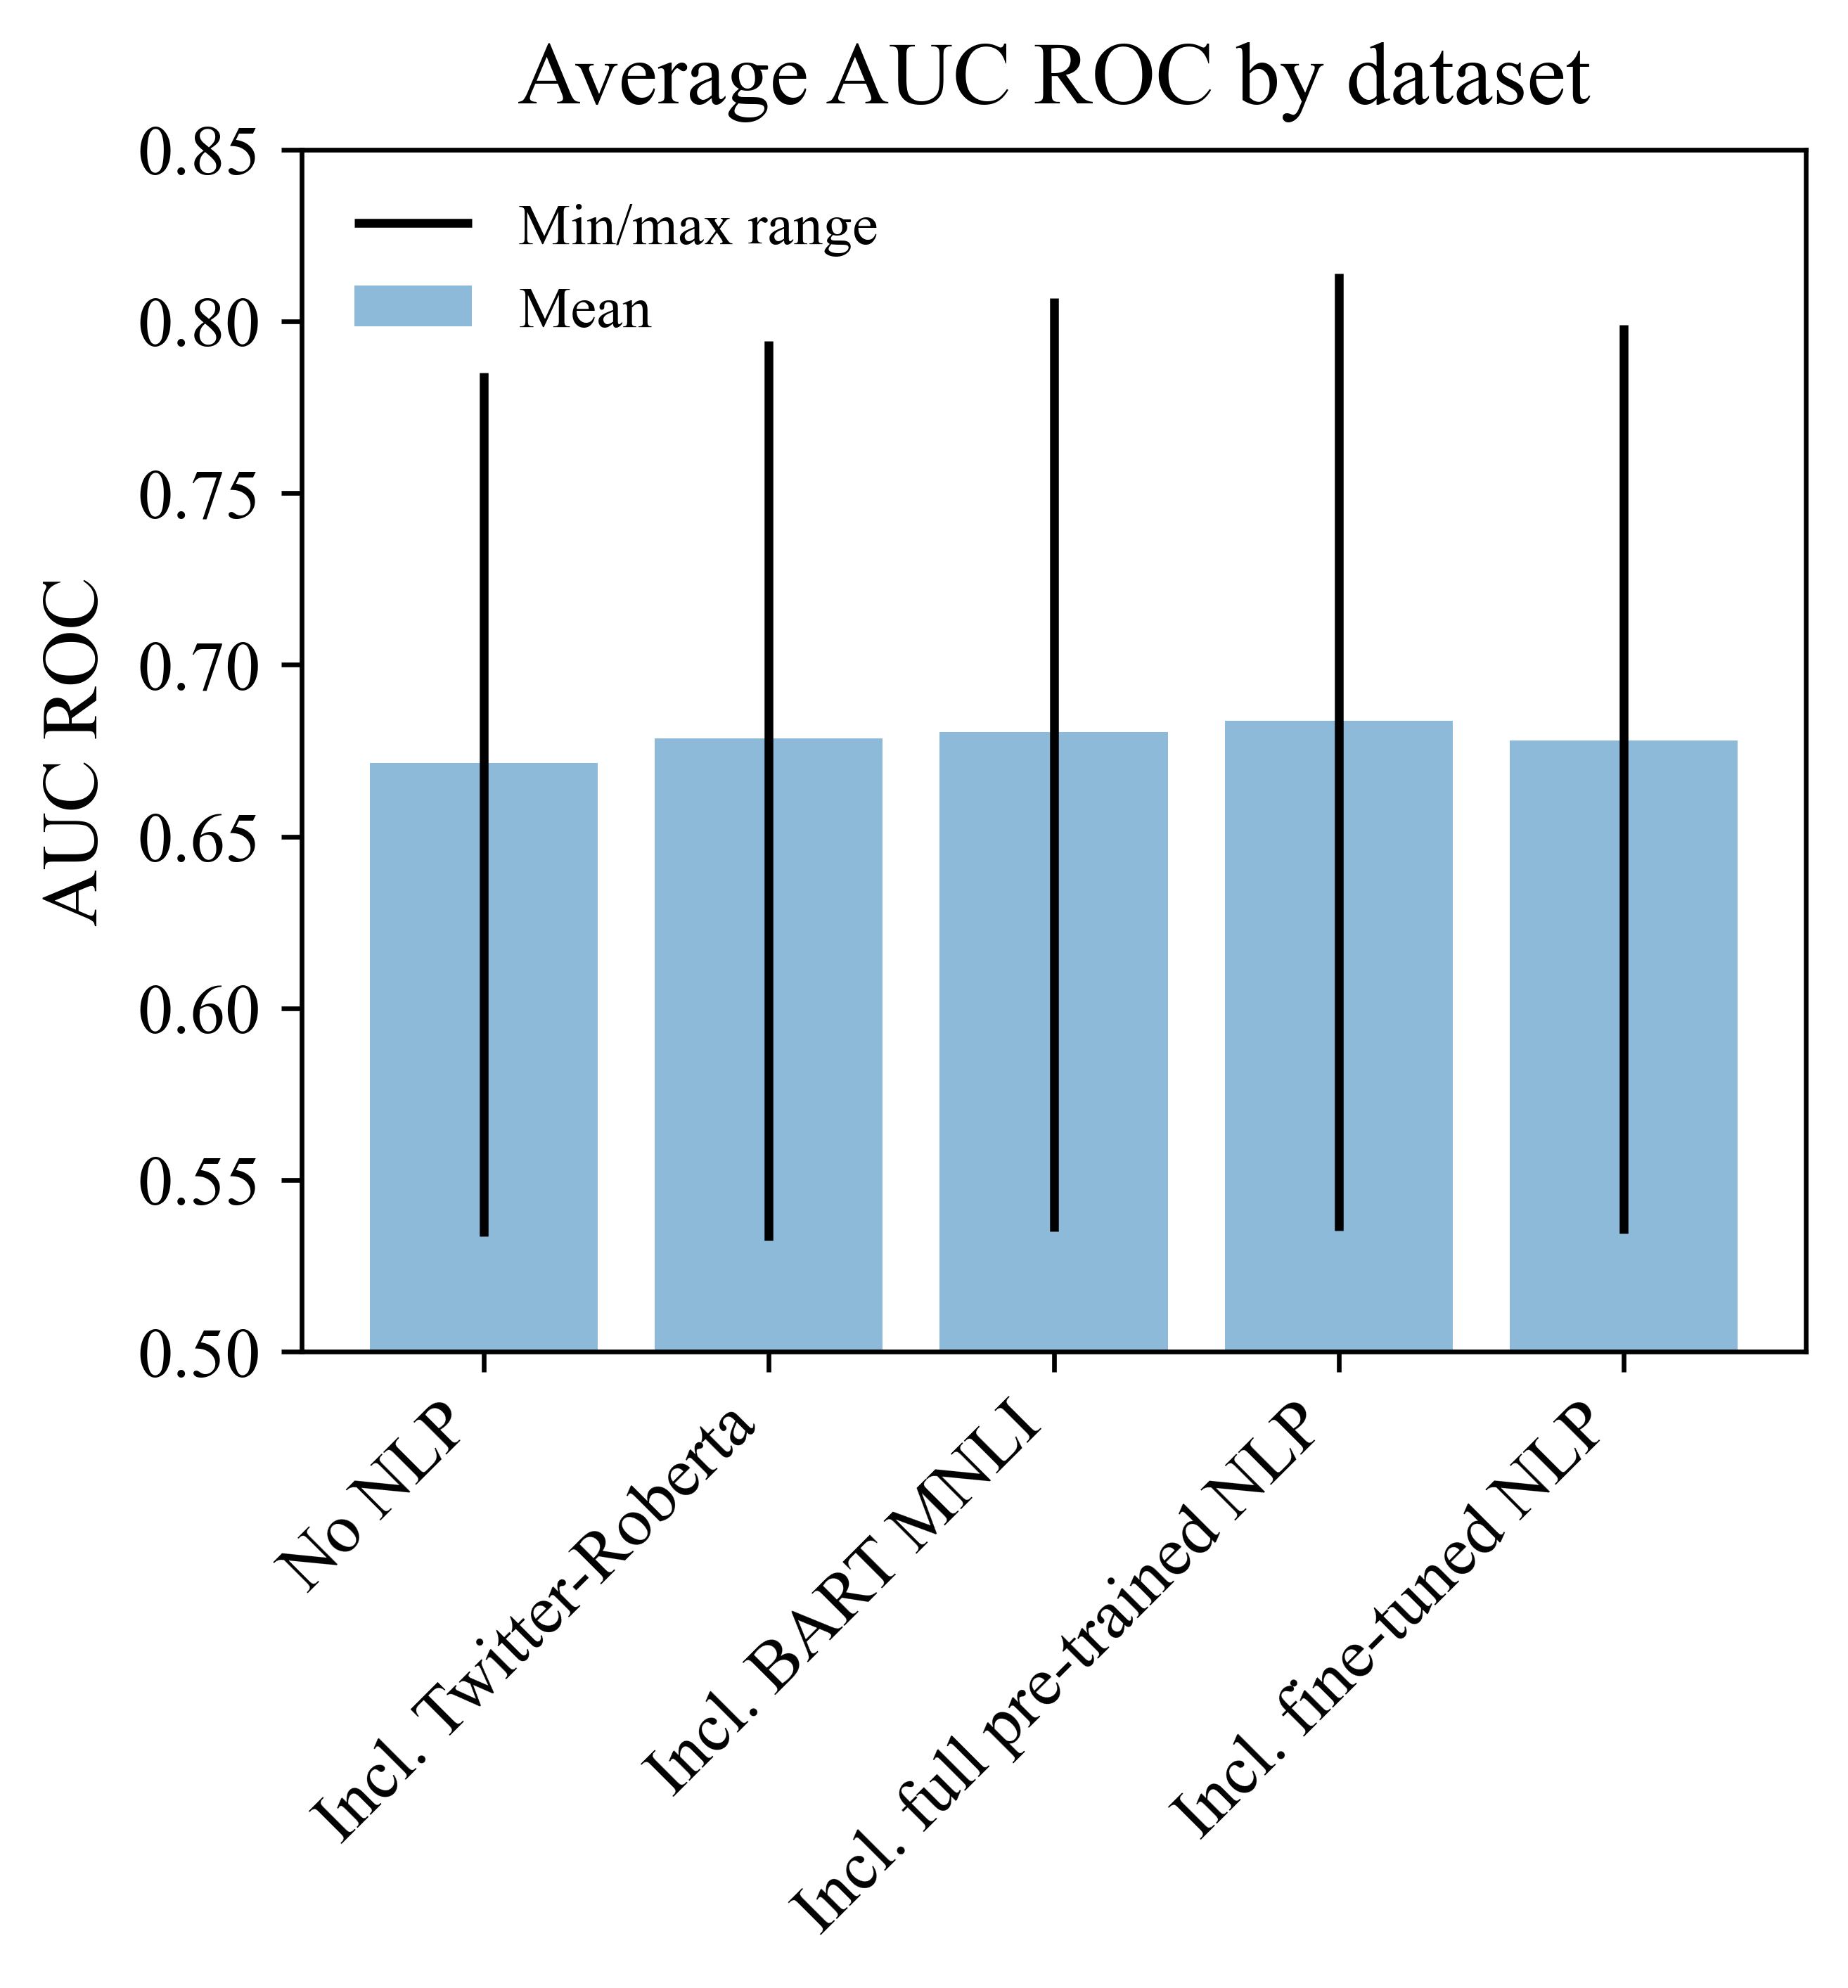

In [141]:
ax = create_barplot_with_variance_whiskers(
    data,
    title='Average AUC ROC by dataset',
    whiskers=True,
    ylabel='AUC ROC',
    xlabels_angle=45,
    axis='columns',
    dtype='numeric',
    figsize=(4.6, 3.7),
)
ax.legend(loc='upper left', frameon=False)
ax.set_ylim([0.5, 0.85])
plt.show()

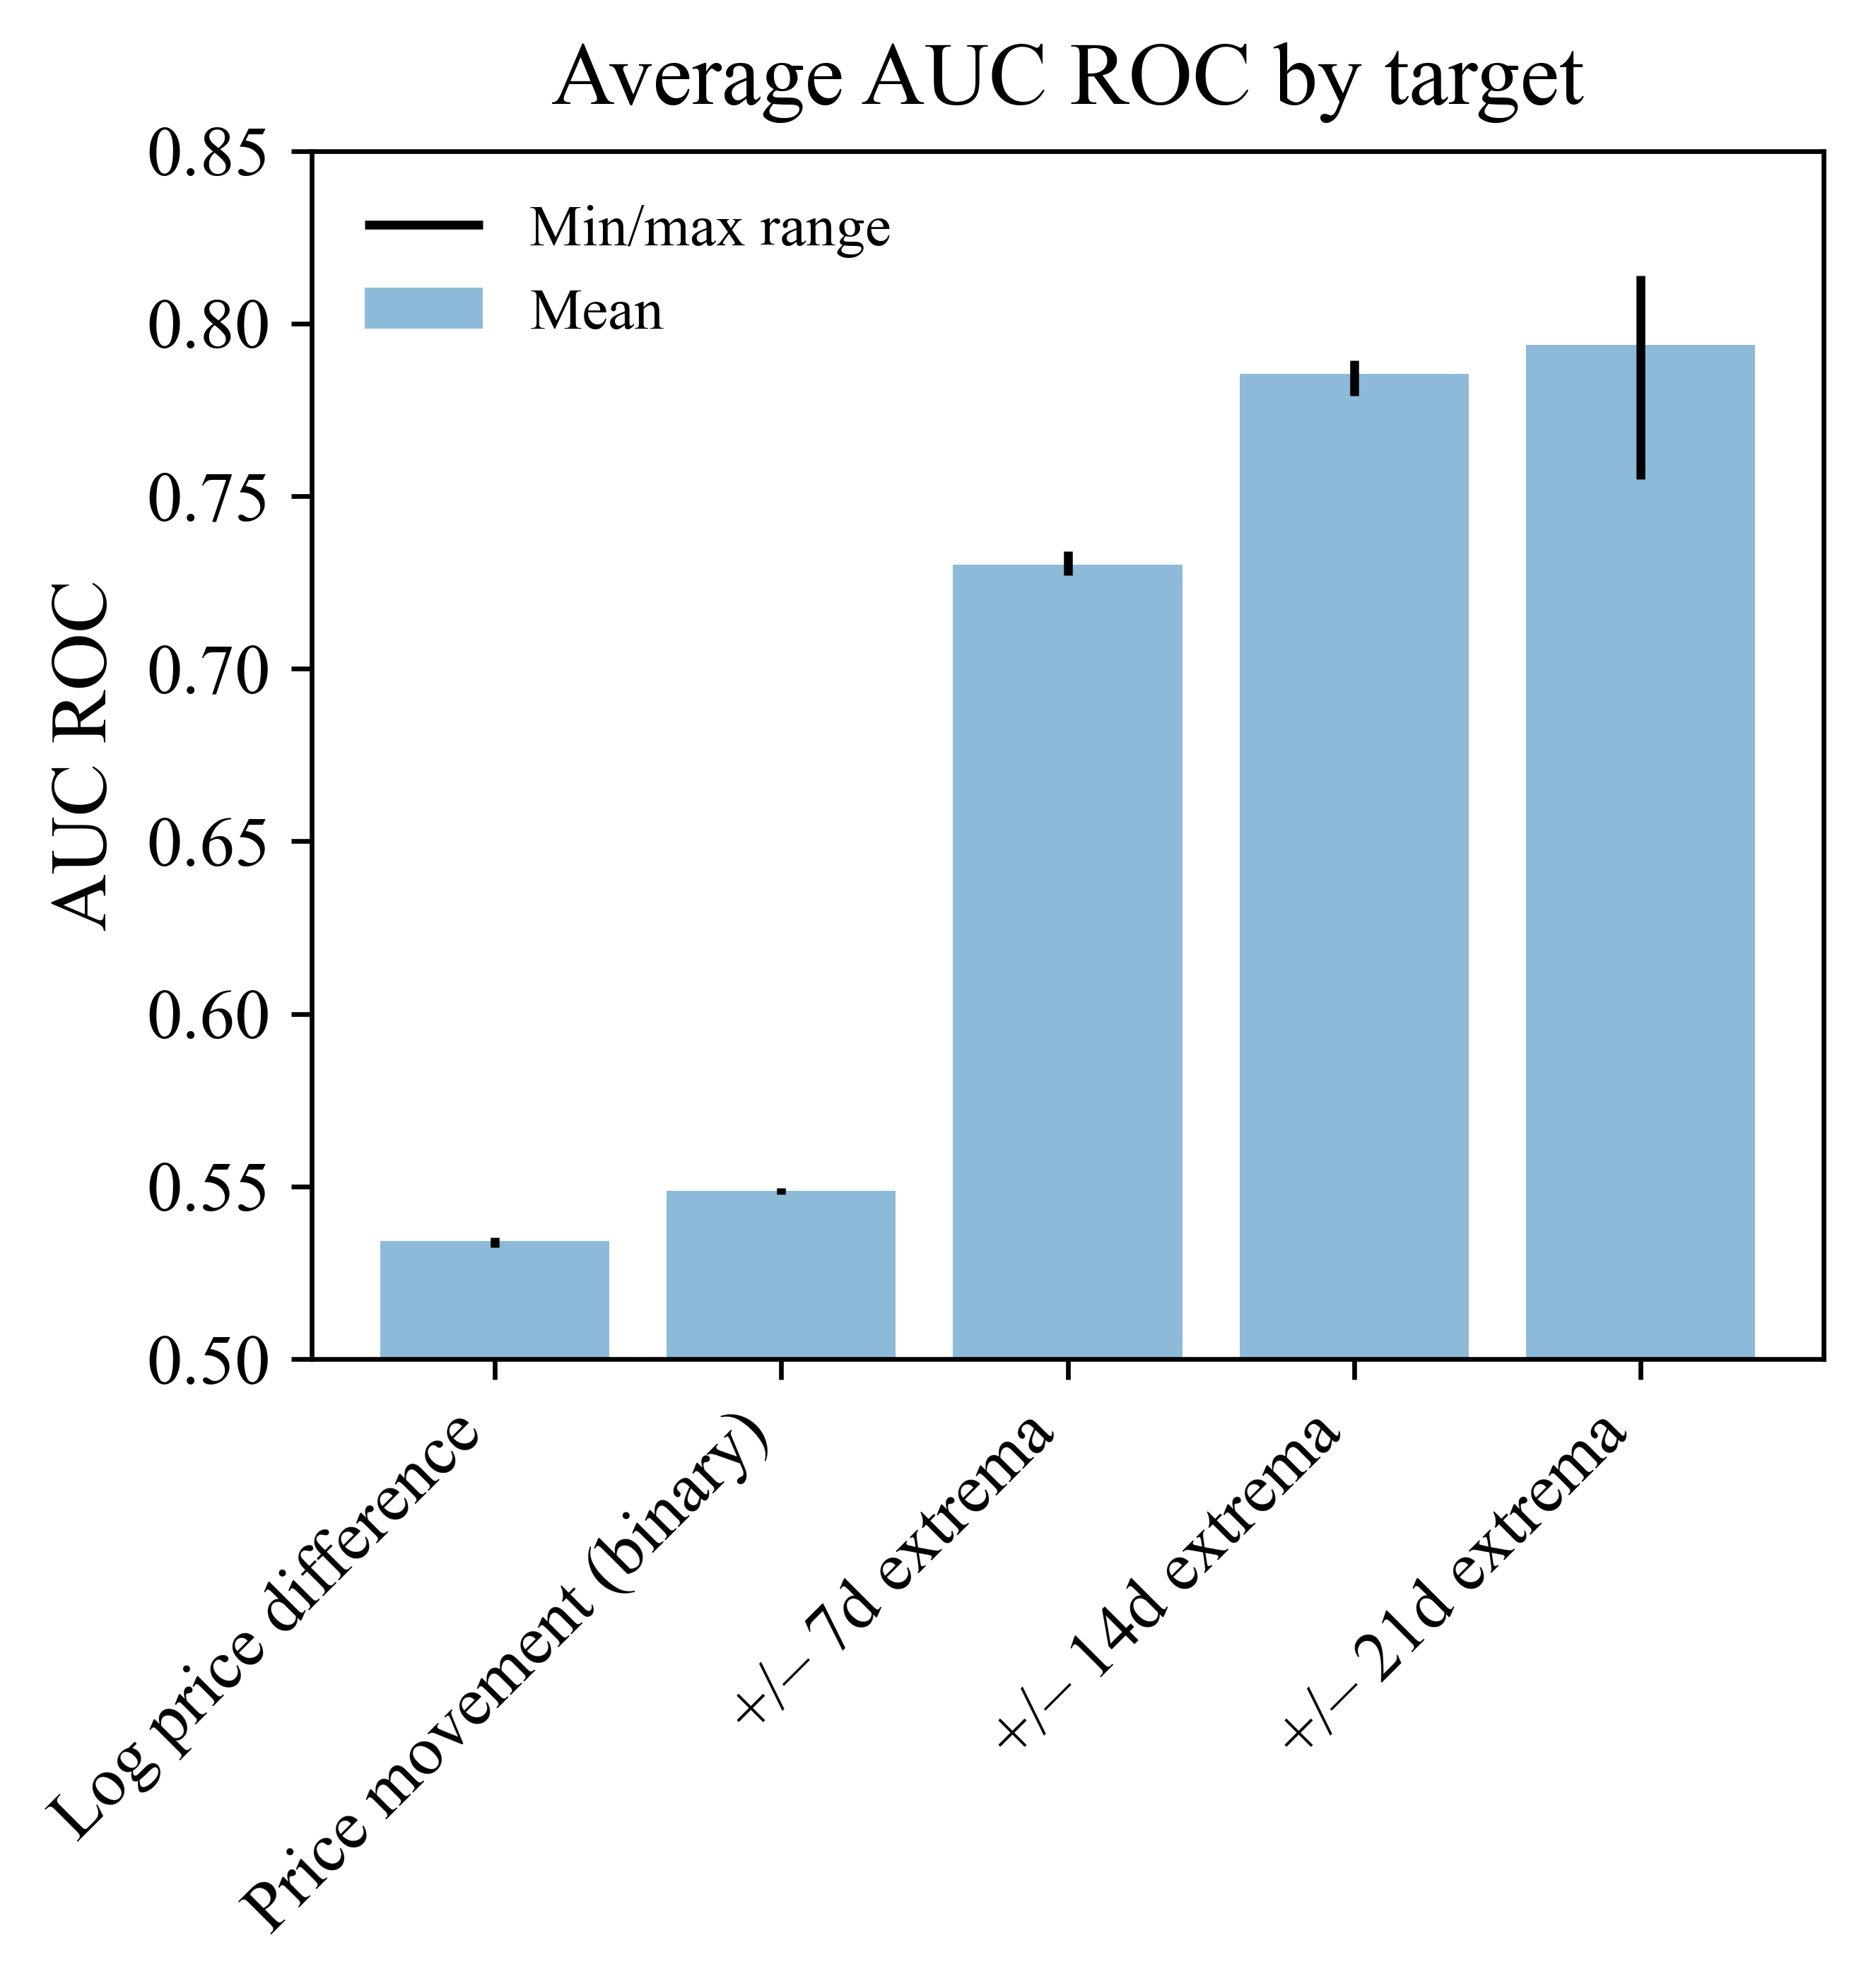

In [142]:
ax = create_barplot_with_variance_whiskers(
    data,
    title='Average AUC ROC by target',
    whiskers=True,
    ylabel='AUC ROC',
    xlabels_angle=45,
    axis='rows',
    dtype='numeric',
    figsize=(4.6, 3.7),
)
ax.legend(loc='upper left', frameon=False)
ax.set_ylim([0.5, 0.85])
plt.show()

## Comparison of models

In [143]:
data = pd.read_csv('./data/models.csv', sep=';')
data['Excess Profit'] = data['Excess Profit'].str.rstrip('%').astype('float') / 100

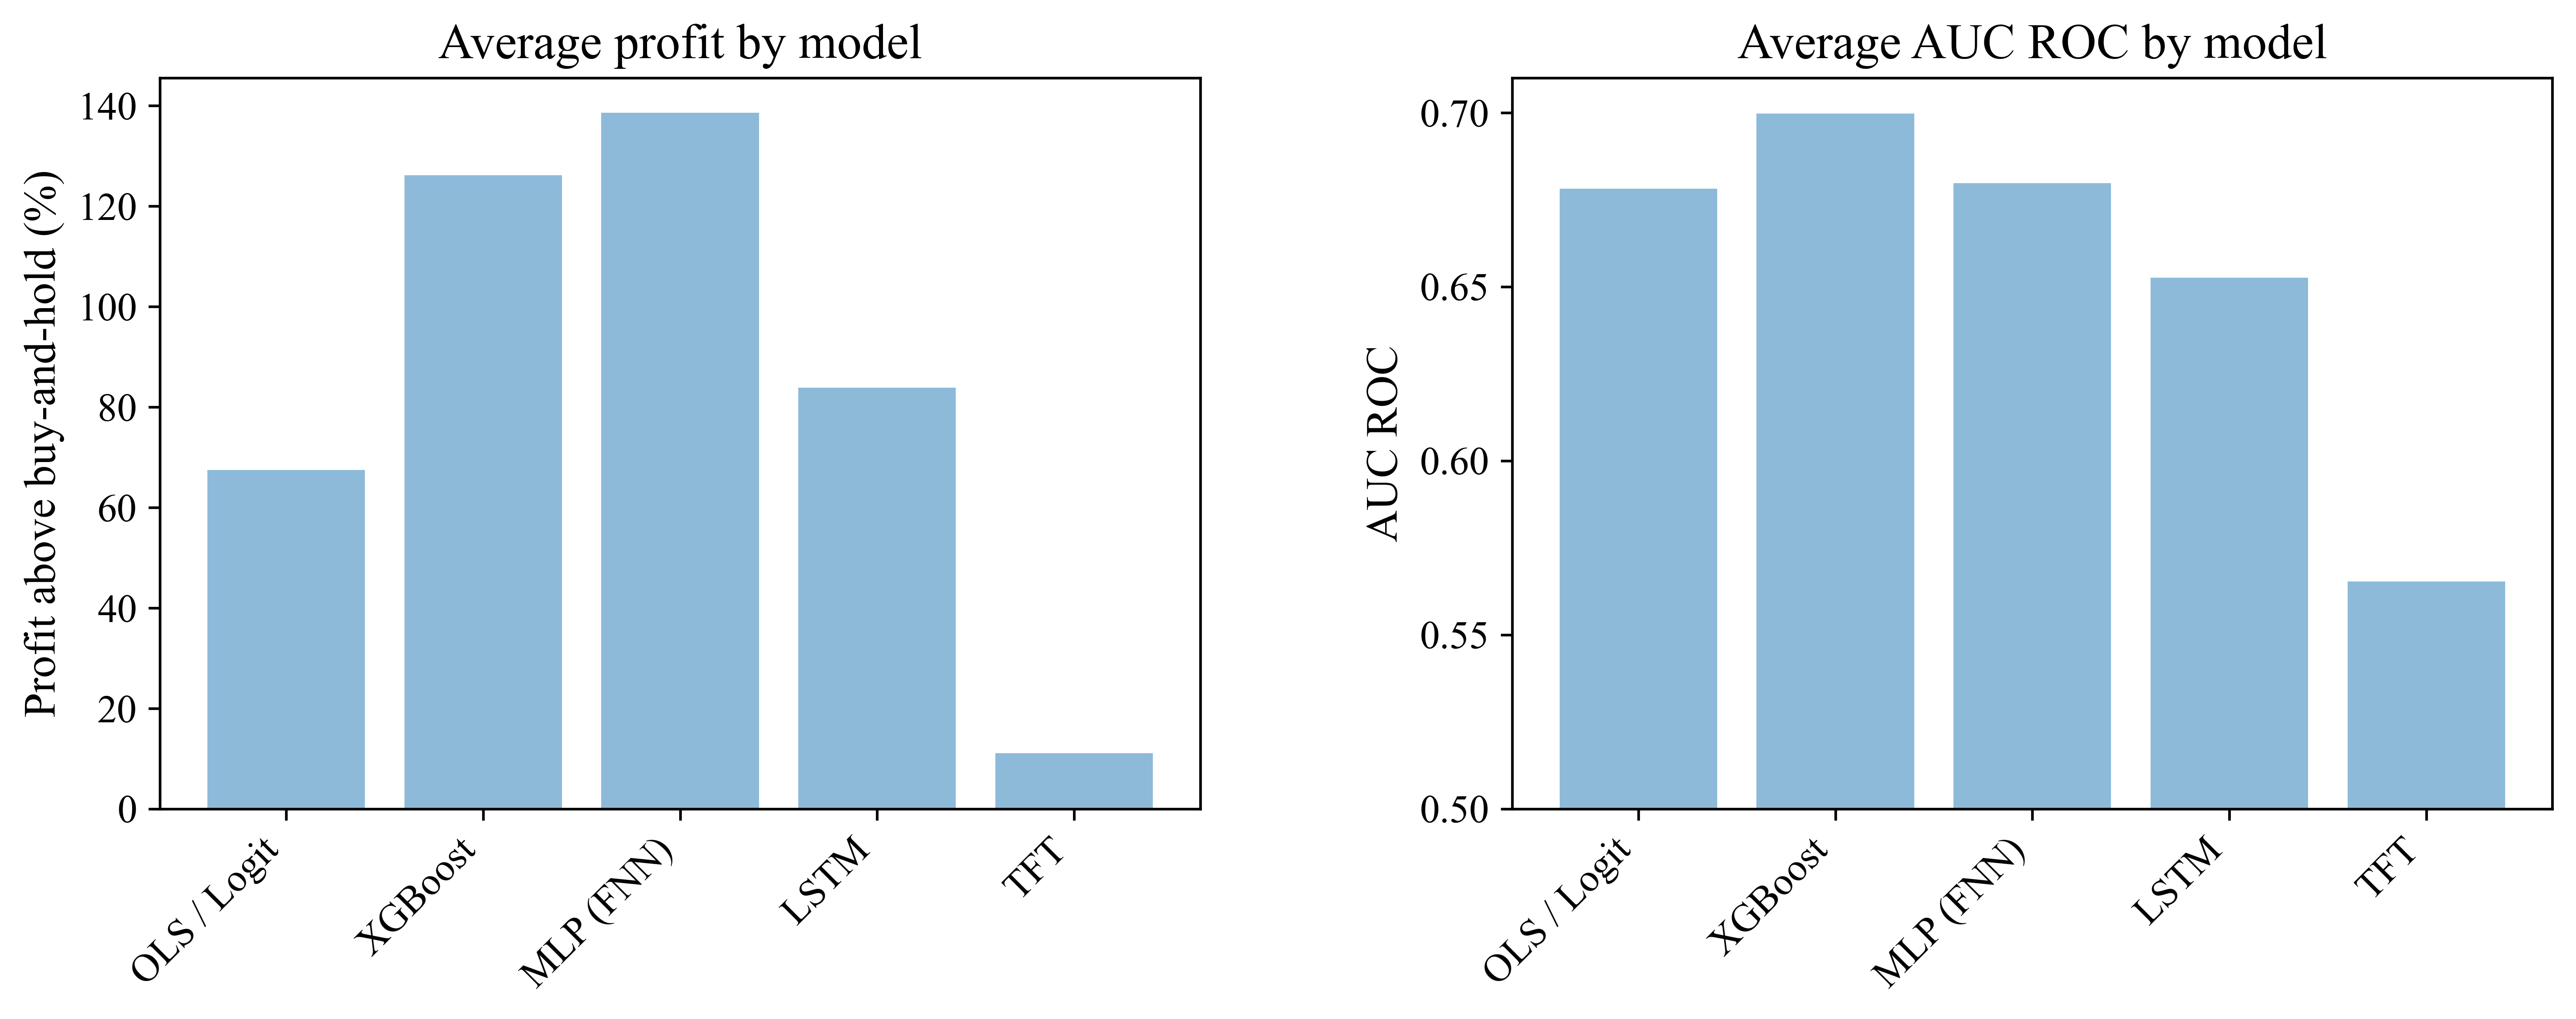

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

# Barplot for Profit
ax[0].bar(data['index'], data['Excess Profit'] * 100, alpha=0.5)  # Multiply by 100 for percentages
ax[0].set_title('Average profit by model')
ax[0].set_ylabel('Profit above buy-and-hold (%)')
ax[0].set_xticks(range(len(data['index'])))  # Set tick locations
ax[0].set_xticklabels(data['index'], rotation=45, ha='right')


# Barplot for AUC ROC
ax[1].bar(data['index'], data['AUC ROC'], alpha=0.5)
ax[1].set_title('Average AUC ROC by model')
ax[1].set_ylabel('AUC ROC')
ax[1].set_ylim([0.5, 0.71])  # Set y-axis limit starting at 0.5
ax[1].set_xticks(range(len(data['index'])))  # Set tick locations
ax[1].set_xticklabels(data['index'], rotation=45, ha='right')
loc = plticker.MultipleLocator(base=0.05) # this locator puts ticks at regular intervals
ax[1].yaxis.set_major_locator(loc)

plt.subplots_adjust(wspace=0.3)  # Adjust the width space between subplots. You can modify this value as needed.
plt.show()